In [1]:
   
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("BuGn_r")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn import linear_model
import xgboost as xgb
import matplotlib.ticker
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import make_scorer, r2_score, explained_variance_score, mean_absolute_error, mean_squared_error 
matplotlib.rcParams.update({'font.size': 16})

pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('train_values.csv')
df.dropna(how = 'any', inplace = True)
df = df.drop(columns = df.columns[0], axis = 1)
df.reset_index(inplace = True)


In [3]:
df.describe()

,index,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
count,850.000000,8.500000e+02,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,1293.232941,2.780386e+05,40573.672941,32.030809,797.994118,49326.681176,157304.978824,30.311198,0.703262,0.141158,0.093357,0.015067,0.023365,0.000786,0.021576,0.001429,12.709134,0.464526,0.061901,0.211982,0.073736,0.305415,0.207748,0.109932,0.087388,0.151662,0.267248,11.818832,5.643059,16.724165,278.572941,2588.410588,1941.488235,0.507033,0.231915,0.150488,0.139944,0.319859,0.300131,0.240066,12.193800,9.703849,1064.145882
std,746.869623,5.169867e+05,86791.586632,8.561396,210.110720,13810.941072,89791.401617,3.050950,0.199145,0.162104,0.120065,0.060156,0.036434,0.001902,0.016866,0.001857,5.282105,0.057507,0.018327,0.061498,0.029941,0.048461,0.051063,0.023812,0.019620,0.044002,0.055546,1.464853,5.166052,8.940121,54.404171,2010.610070,1404.452671,0.014006,0.029006,0.035498,0.056474,0.070239,0.046527,0.096924,2.261898,2.412321,2281.128368
min,0.000000,9.324000e+03,791.000000,14.847000,424.000000,23749.000000,35465.000000,17.897000,0.100149,0.002967,0.000397,0.000000,0.000000,0.000000,0.000000,0.000000,2.582000,0.260000,0.027000,0.061000,0.014000,0.151000,0.054000,0.054000,0.050000,0.044000,0.131000,7.542542,-0.400000,3.090000,160.000000,490.000000,410.000000,0.411000,0.134000,0.069000,0.033932,0.127127,0.154536,0.050847,7.229569,3.234867,0.000000
25%,617.750000,5.604500e+04,6531.750000,26.291250,638.000000,40909.250000,101645.500000,28.444000,0.576637,0.025493,0.025142,0.001300,0.005882,0.000000,0.013257,0.000401,9.059250,0.433000,0.050000,0.164000,0.051000,0.275000,0.176000,0.092250,0.070250,0.119000,0.228000,10.802925,2.400000,9.912500,239.000000,1560.000000,1269.000000,0.502000,0.214000,0.127250,0.101503,0.273726,0.269019,0.163536,10.700095,8.005607,107.250000
50%,1341.500000,1.152670e+05,13800.000000,30.443000,748.500000,46330.000000,135016.500000,30.035500,0.751572,0.073666,0.052212,0.002390,0.010809,0.000201,0.017862,0.000993,12.051000,0.471000,0.059000,0.215000,0.067000,0.307000,0.209000,0.109000,0.081000,0.152000,0.265000,12.172195,4.135000,14.805000,273.000000,2069.000000,1660.000000,0.509000,0.230000,0.149000,0.127255,0.319800,0.302057,0.218391,11.887706,9.797865,282.500000
75%,1950.750000,2.546710e+05,35553.500000,36.557250,899.000000,56103.750000,180054.250000,32.092750,0.867656,0.204341,0.109595,0.004500,0.025239,0.000700,0.023934,0.001899,15.566750,0.506000,0.071000,0.252750,0.090000,0.337750,0.241000,0.125000,0.099000,0.180750,0.306000,12.913920,7.455000,21.235000,317.000000,2969.000000,2199.000000,0.515000,0.248000,0.172000,0.174611,0.367107,0.327914,0.297442,13.422668,11.588770,889.750000
max,2545.000000,5.279852e+06,882101.000000,70.610000,1728.000000,123452.000000,803337.000000,41.959000,0.9

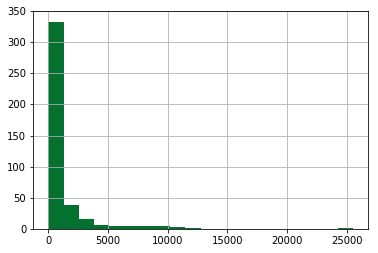

In [4]:
df_B = df.loc[df.year == "a", :]
df_B.loc[:,'evictions'].hist(bins = 20)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

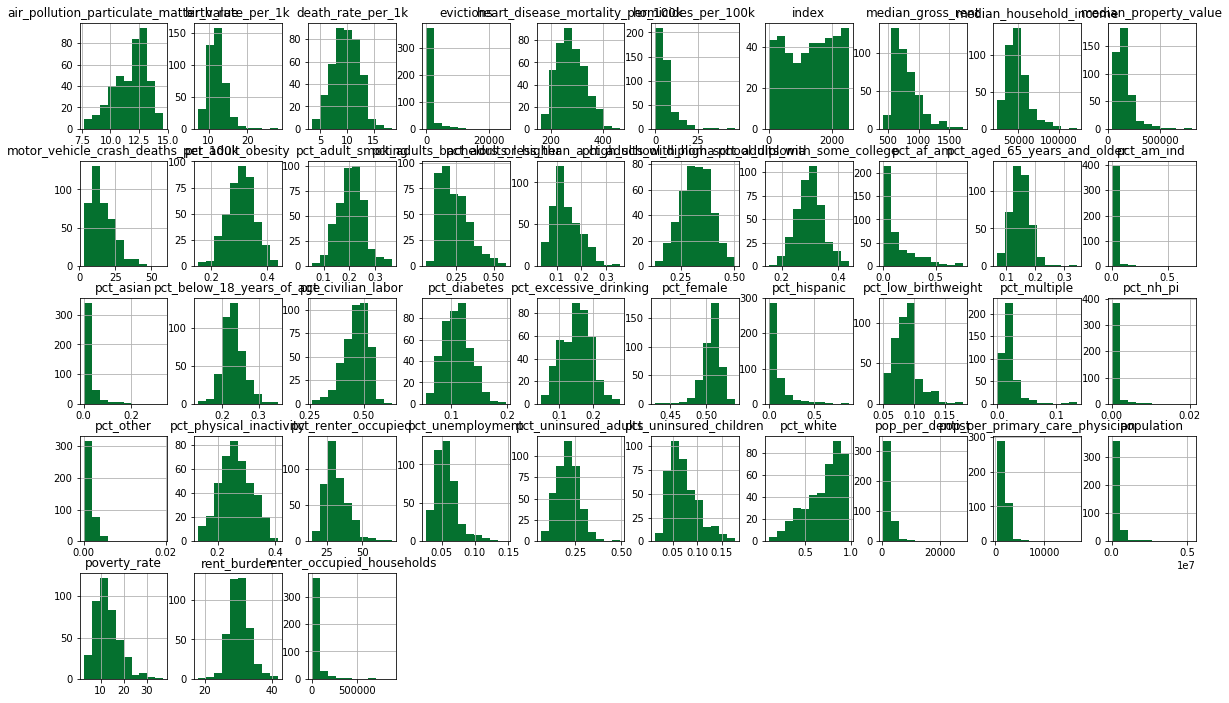

In [5]:
df_B.hist(figsize=(20,50), layout=(20,10))
plt.tight_layout

In [6]:
df_B.shape

(416, 49)

In [7]:
list(df_B.columns)

['index',
 'county_code',
 'year',
 'state',
 'population',
 'renter_occupied_households',
 'pct_renter_occupied',
 'median_gross_rent',
 'median_household_income',
 'median_property_value',
 'rent_burden',
 'pct_white',
 'pct_af_am',
 'pct_hispanic',
 'pct_am_ind',
 'pct_asian',
 'pct_nh_pi',
 'pct_multiple',
 'pct_other',
 'poverty_rate',
 'rucc',
 'urban_influence',
 'economic_typology',
 'pct_civilian_labor',
 'pct_unemployment',
 'pct_uninsured_adults',
 'pct_uninsured_children',
 'pct_adult_obesity',
 'pct_adult_smoking',
 'pct_diabetes',
 'pct_low_birthweight',
 'pct_excessive_drinking',
 'pct_physical_inactivity',
 'air_pollution_particulate_matter_value',
 'homicides_per_100k',
 'motor_vehicle_crash_deaths_per_100k',
 'heart_disease_mortality_per_100k',
 'pop_per_dentist',
 'pop_per_primary_care_physician',
 'pct_female',
 'pct_below_18_years_of_age',
 'pct_aged_65_years_and_older',
 'pct_adults_less_than_a_high_school_diploma',
 'pct_adults_with_high_school_diploma',
 'pct_ad

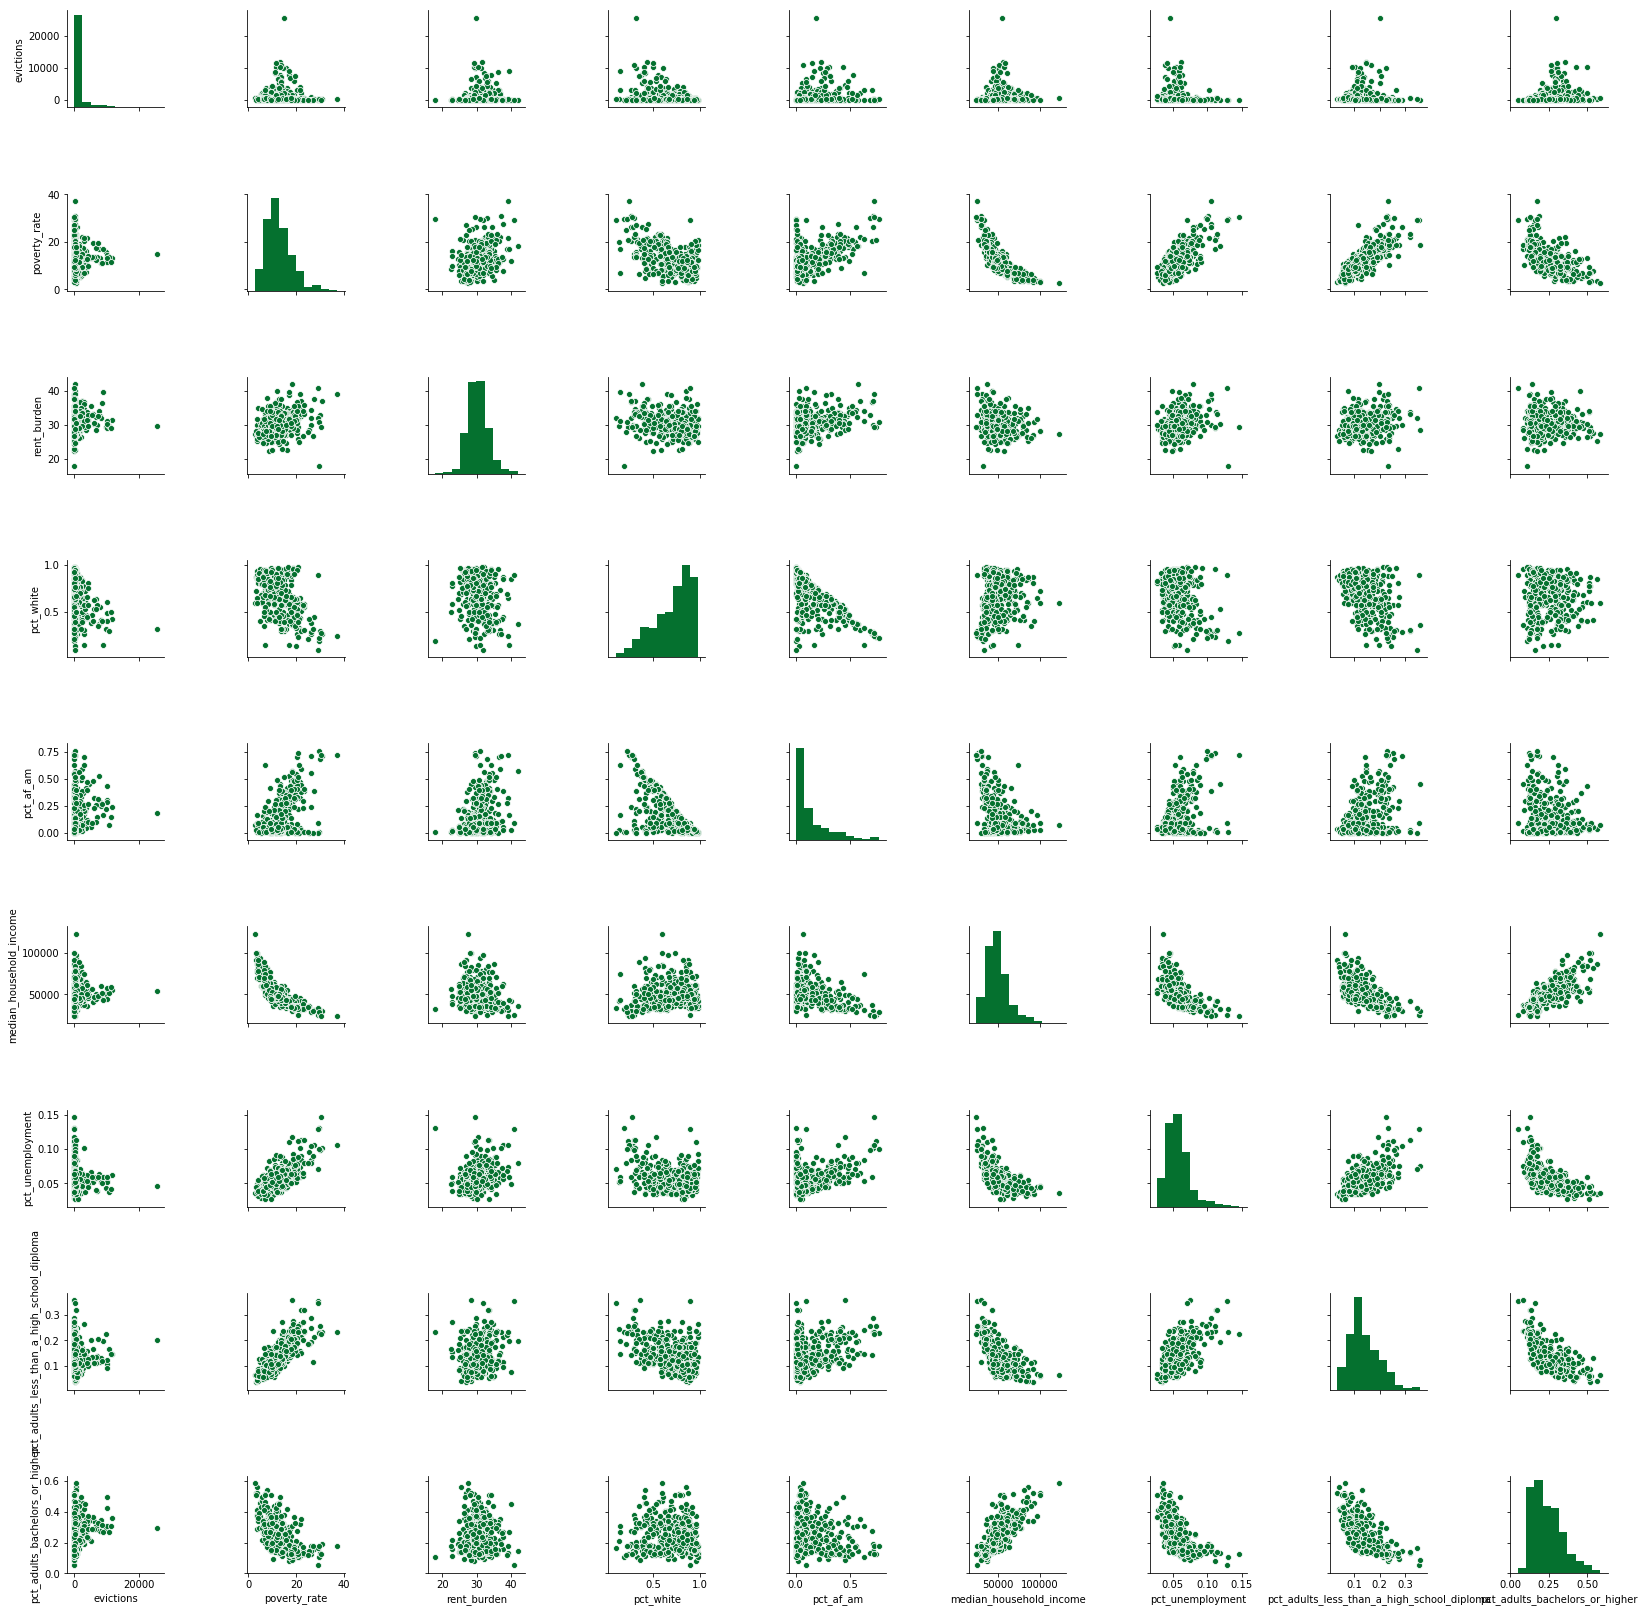

In [8]:
sns.pairplot(df_B, palette="husl", vars=['evictions',"poverty_rate", 'rent_burden','pct_white',
 'pct_af_am','median_household_income',
 'pct_unemployment',
 'pct_adults_less_than_a_high_school_diploma',
 'pct_adults_bachelors_or_higher'])

In [9]:
corr = df_B.loc[:,['evictions',"poverty_rate", 'rent_burden','pct_white',
 'pct_af_am','median_household_income',
 'pct_unemployment',
 'pct_adults_less_than_a_high_school_diploma',
 'pct_adults_bachelors_or_higher']].corr()

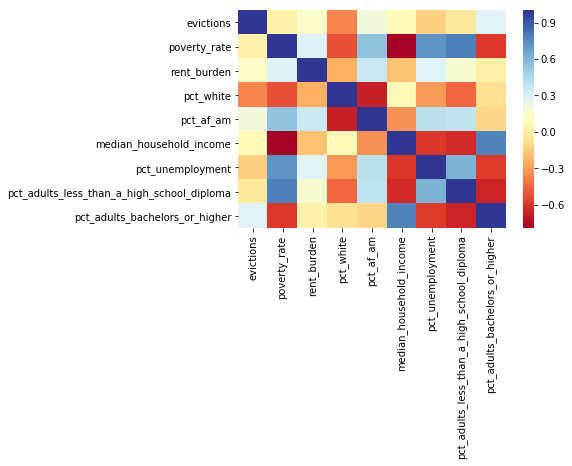

In [10]:
sns.heatmap(corr, cmap="RdYlBu")

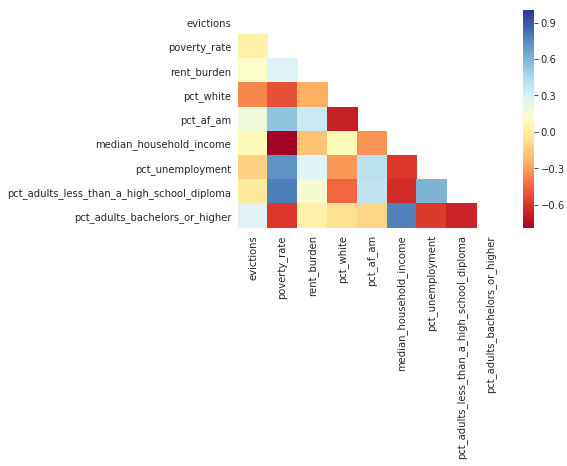

In [11]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, cmap="RdYlBu")

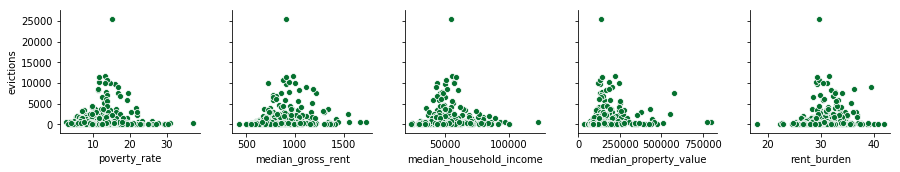

In [12]:
sns.pairplot(data=df_B, y_vars=['evictions'],
                  x_vars=['poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'rent_burden'])

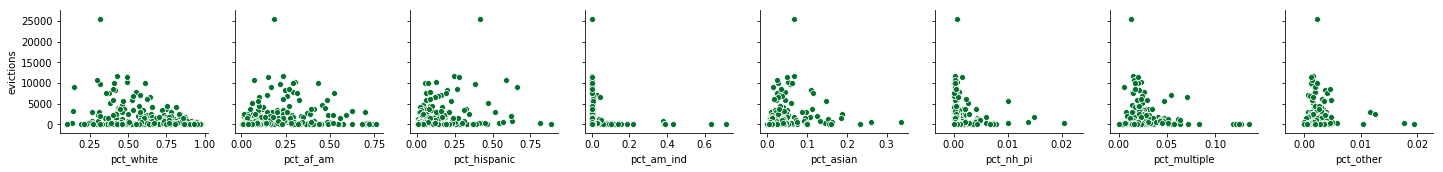

In [13]:
sns.pairplot(data=df_B, y_vars=['evictions'],
                  x_vars=['pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian',
       'pct_nh_pi', 'pct_multiple', 'pct_other'])

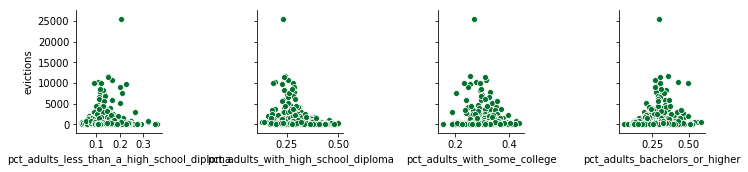

In [14]:
sns.pairplot(data=df_B, y_vars=['evictions'],
                  x_vars=['pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma',
       'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher'])

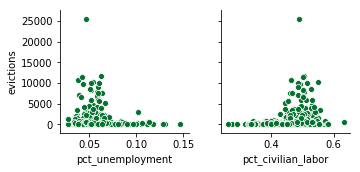

In [15]:
sns.pairplot(data=df_B, y_vars=['evictions'],
                  x_vars=['pct_unemployment', 'pct_civilian_labor'])

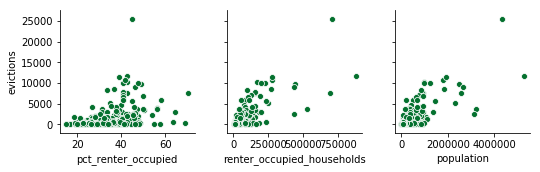

In [16]:
sns.pairplot(data=df_B, y_vars=['evictions'],
                  x_vars=['pct_renter_occupied','renter_occupied_households','population'])

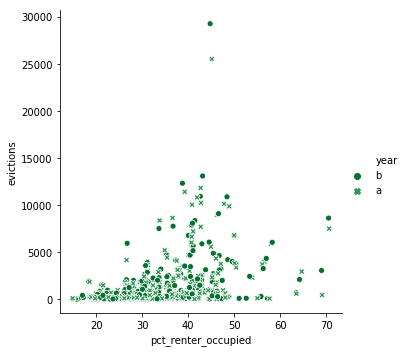

In [46]:
sns.relplot(x="pct_renter_occupied", y="evictions", hue="year", style="year",
            data=df);

Feature Selection

In [18]:
df.columns

Index(['index', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_sch

In [19]:
print(df_B['urban_influence'].unique())
Features = df_B['urban_influence']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Micropolitan adjacent to a small metro area'
 'Large-in a metro area with at least 1 million residents or more'
 'Noncore adjacent to a small metro with town of at least 2,500 residents'
 'Small-in a metro area with fewer than 1 million residents'
 'Micropolitan adjacent to a large metro area'
 'Micropolitan not adjacent to a metro area'
 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents'
 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents'
 'Noncore adjacent to a large metro area'
 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents'
 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents']
[ 2  0  6  0 10  1  0 10  2  3 10  0  3 10  0 10 10  0 10 10 10 10 10 10
  0 10  3  2  2  0  2  3 10  1  0 10  0  1  2  0 10  0 10  0 10 10 10  0
  7  0  5 10  2  0 10  0  0 10 10 10 10 10  0  1  0  2  4  3  0  0 10  2
  0  2  0  0  0 10 10  0 10  3 10  0 10

In [20]:
df_dummy = pd.get_dummies(df[['county_code','state', 'year']])

In [21]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = [ 'rucc', 'economic_typology']

for col in categorical_columns:
    temp = encode_string(df_B[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(416, 26)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]


In [23]:
col_list = ['poverty_rate', 'pct_renter_occupied', 'median_gross_rent',\
       'median_household_income', 'median_property_value', 'rent_burden',\
       'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian',\
       'pct_nh_pi', 'pct_multiple', 'pct_other', 'renter_occupied_households',\
       'pct_uninsured_adults', 'pct_unemployment', 'pct_uninsured_children',
       'pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma',\
       'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher']

In [24]:
data_norm = preprocessing.normalize(df[col_list], axis = 0)

df_norm = pd.DataFrame(data_norm, columns = col_list)

In [25]:
X = pd.concat([df_norm, df_dummy], axis = 1)
y = df.evictions

In [26]:
X.shape

(850, 523)

In [27]:
y.shape

(850,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-5)
#clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

For comparison: Standard deviation¶

In [30]:
y.std()

2281.1283679849457

In [31]:
y_train.std()

2407.525788798256

In [32]:
y_test.std()

1660.2080342597244

Prediction with Xgboost:

In [33]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)
evallist = [(xgtrain, 'train'),(xgtest, 'eval'),]

In [34]:
param = {'silent': 1, 'max_depth': 5,'min_child_weight': 4,\
         'learning_rates': 0.05, 'alpha':1.5, 'lambda':0.5, 'objective':'reg:linear'}
num_boost_round = 100
bst = xgb.train(param, xgtrain, num_boost_round, evallist, early_stopping_rounds=10)

[0]	train-rmse:2009.21	eval-rmse:1408.27
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:1550.81	eval-rmse:1156.18
[2]	train-rmse:1221.42	eval-rmse:874.384
[3]	train-rmse:1004.4	eval-rmse:716.649
[4]	train-rmse:826.705	eval-rmse:629.794
[5]	train-rmse:726.964	eval-rmse:553.796
[6]	train-rmse:661.041	eval-rmse:511.235
[7]	train-rmse:621.113	eval-rmse:482.763
[8]	train-rmse:551.052	eval-rmse:470.43
[9]	train-rmse:522.376	eval-rmse:449.8
[10]	train-rmse:482.403	eval-rmse:443.512
[11]	train-rmse:434.486	eval-rmse:437.92
[12]	train-rmse:407.861	eval-rmse:432.098
[13]	train-rmse:390.879	eval-rmse:435.436
[14]	train-rmse:356.856	eval-rmse:431.848
[15]	train-rmse:342.33	eval-rmse:428.326
[16]	train-rmse:322.842	eval-rmse:427.833
[17]	train-rmse:317.566	eval-rmse:425.105
[18]	train-rmse:307.188	eval-rmse:423.219
[19]	train-rmse:291.778	eval-rmse:419.207
[20]	train-rmse:285.459	eval-rmse

In [35]:
X_dtest = xgb.DMatrix(X_test.values)
X_dtrain = xgb.DMatrix(X_train.values)
y_pred = bst.predict(X_dtest)
y_pred_train = bst.predict(X_dtrain)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

 Evaluation of Training Set:
 r2_score	0.9983918275588864,
 explained_variance_score	0.998391835793457,
 mean_absolute_error	66.34899422806852,
 mean_squared_error	9307.549889366413.

 Evaluation of Test Set:
 r2_score	0.9453265568357295,
 explained_variance_score	0.9455504552497223,
 mean_absolute_error	196.3945190843414,
 mean_squared_error	149809.4573679273.



In [36]:
model_xgb = xgb.XGBRegressor(max_depth = 5,  min_child_weight = 4, n_estimators=40,\
                             silent=True, objective='reg:linear', gamma = 1, \
                            booster='gbtree', subsample=1,colsample_bytree=1, \
                              reg_alpha = 1.5, reg_lamba = 0.5, \
                             base_score=0.1, random_state=0)

param_grid = {'learning_rate': [x/10 for x in range(1,5,1)]
             }
scorer = make_scorer(mean_squared_error)
xgb_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid, cv=5, scoring=scorer)
xgb_search.fit(X_train,y_train)
y_pred = xgb_search.best_estimator_.predict(X_test)

In [37]:
xgb_search.best_params_

{'learning_rate': 0.1}

In [38]:
y_pred = xgb_search.best_estimator_.predict(X_test)
y_pred_train = xgb_search.best_estimator_.predict(X_train)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

 Evaluation of Training Set:
 r2_score	0.9630027664400547,
 explained_variance_score	0.9630986456492334,
 mean_absolute_error	197.58519622928955,
 mean_squared_error	214127.2840674311.

 Evaluation of Test Set:
 r2_score	0.9088776261689494,
 explained_variance_score	0.9089539223068605,
 mean_absolute_error	256.6336010428036,
 mean_squared_error	249682.34279102687.



Text(0.5, 1.0, 'Feature Importances')

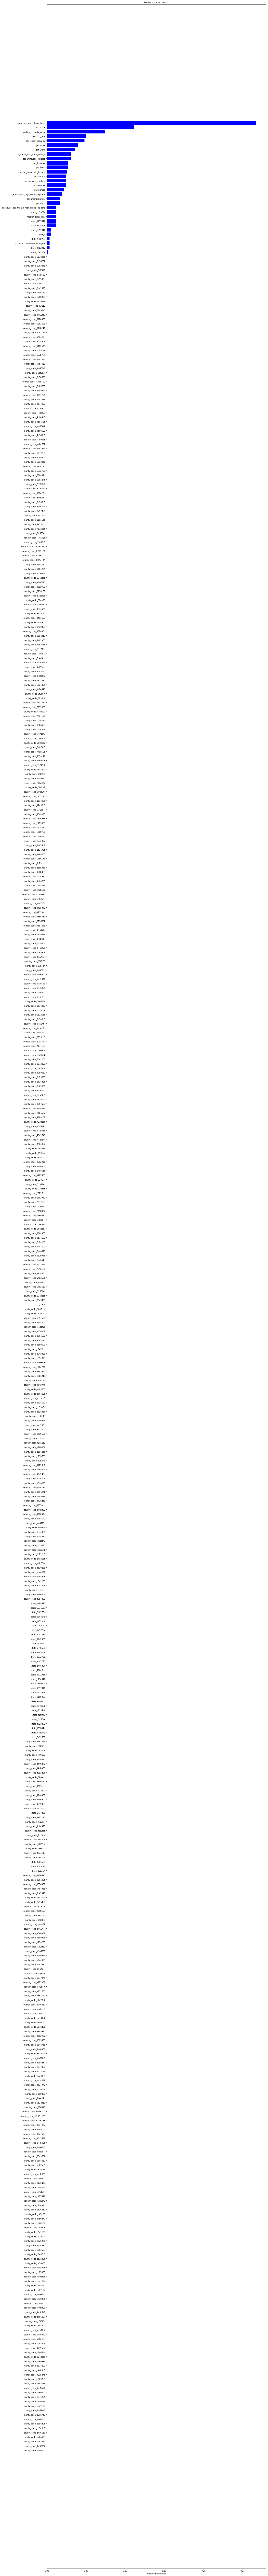

In [39]:
features = X.columns
importances = xgb_search.best_estimator_.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize = (20,240))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')

In [40]:

model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, gamma = 1, min_child_weight=4, \
                         reg_alpha = 1.5, reg_lambda = 0.5,n_estimators=400, silent=False, base_score = 0.1, \
                         subsample=1, colsample_bytree=1,
                         objective='reg:linear', booster='gbtree')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[20:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_

[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[20:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[20:21:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[20:21:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_

[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:21:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_